<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
import time
import threading
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [21]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [22]:
print(df.dtypes)
print(df.shape)

Member_number       int64
Date               object
itemDescription    object
dtype: object
(38765, 3)


In [23]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

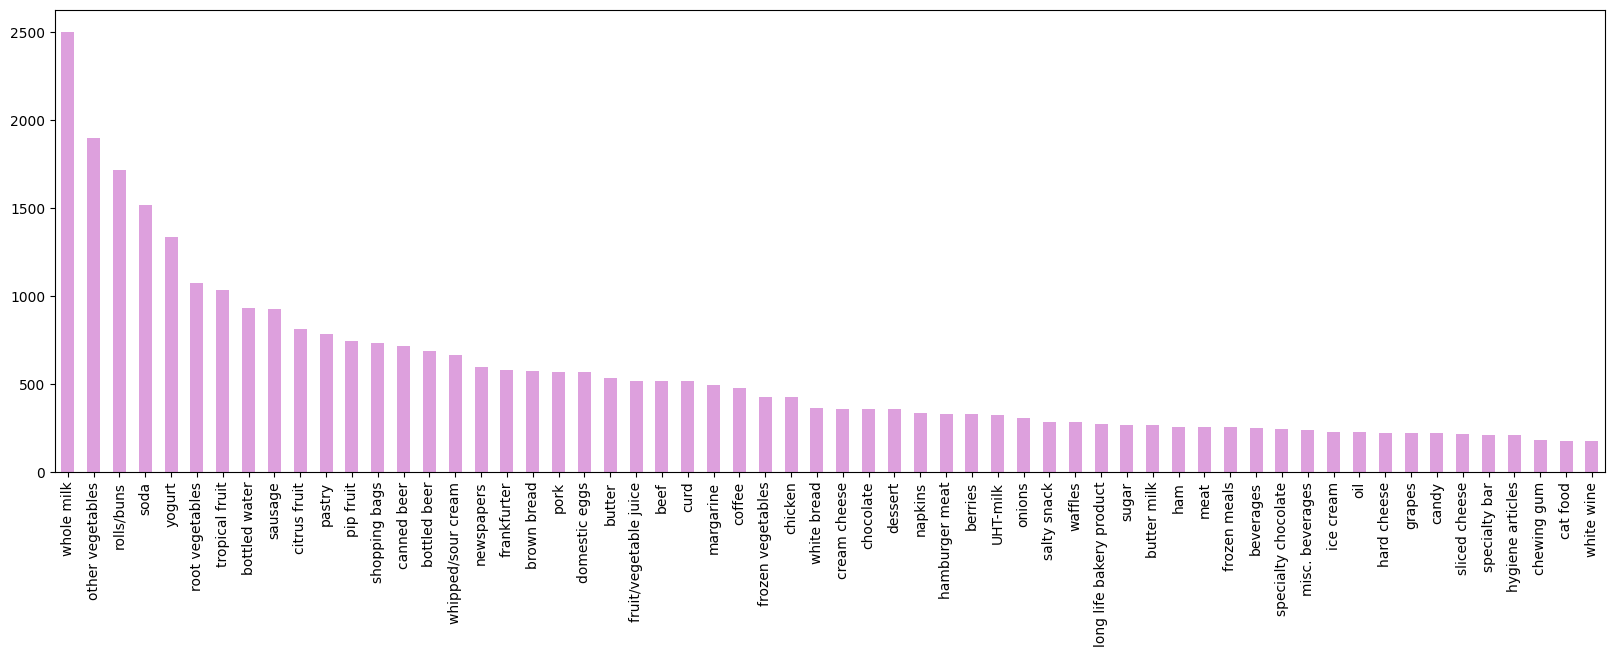

In [24]:
df['itemDescription'].value_counts()[:60].plot(kind='bar',\
                                               figsize=(20,6), color='plum');

In [25]:
df['Quantity'] = 1
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
def encode(x):
  if x >= 0:
    return 1
  else:
    return 0
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
executiontime = [0,0]
aprioricompleted = threading.Event()
fpcompleted = threading.Event()

In [27]:
def runapriori():
  stime = time.time()
  global aprioriresults
  aprioriresults = apriori(basket, min_support=0.02, use_colnames=True)
  executiontime[0] = time.time() - stime
  aprioricompleted.set()
def runfp():
  stime = time.time()
  global fpresults
  fpresults = fpgrowth(basket, min_support=0.02, use_colnames=True)
  executiontime[1] = time.time() - stime
  fpcompleted.set()

In [28]:
apthread = threading.Thread(target=runapriori)
fpthread = threading.Thread(target=runfp)

In [29]:
apthread.start()
fpthread.start()
aprioricompleted.wait()
fpcompleted.wait()
apthread.join()
fpthread.join()

In [30]:
executiontime

[0.6007411479949951, 0.5773842334747314]

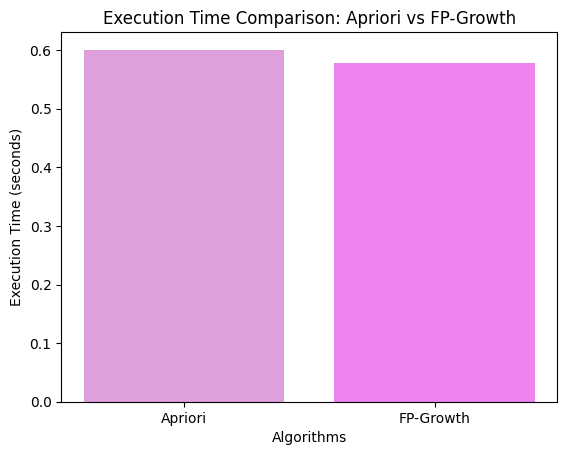

In [31]:
pt.bar(['Apriori', 'FP-Growth'], executiontime, color=['plum','violet'])
pt.xlabel('Algorithms')
pt.ylabel('Execution Time (seconds)')
pt.title('Execution Time Comparison: Apriori vs FP-Growth');

In [32]:
mins = float(input("Enter the minimum support threshold: "))
minc = float(input("Enter the minimum confidence threshold: "))
ap = apriori(basket, min_support=mins, use_colnames=True)
print('The results with Apriori is')
association_rules(ap, metric='confidence', min_threshold=minc)

Enter the minimum support threshold: 0.1
Enter the minimum confidence threshold: 0.1
The results with Apriori is


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
2,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772
3,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
5,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,0.006103,1.024178,0.078849
6,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
7,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
8,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
9,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350


In [33]:
fp = fpgrowth(basket, min_support=mins, use_colnames=True)
print('The results with FP-Growth is')
association_rules(fp, metric='confidence', min_threshold=minc)

The results with FP-Growth is


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
1,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,0.010187,1.052593,0.123855
3,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,0.010187,1.044316,0.130743
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
5,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,0.006103,1.024178,0.078849
6,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
7,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
8,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
9,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
